In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

In [3]:

# Loading the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Basic inspection of the data
print(iris_df.head())
print(iris_df.info())
print("Missing values per column:", iris_df.isnull().sum())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float

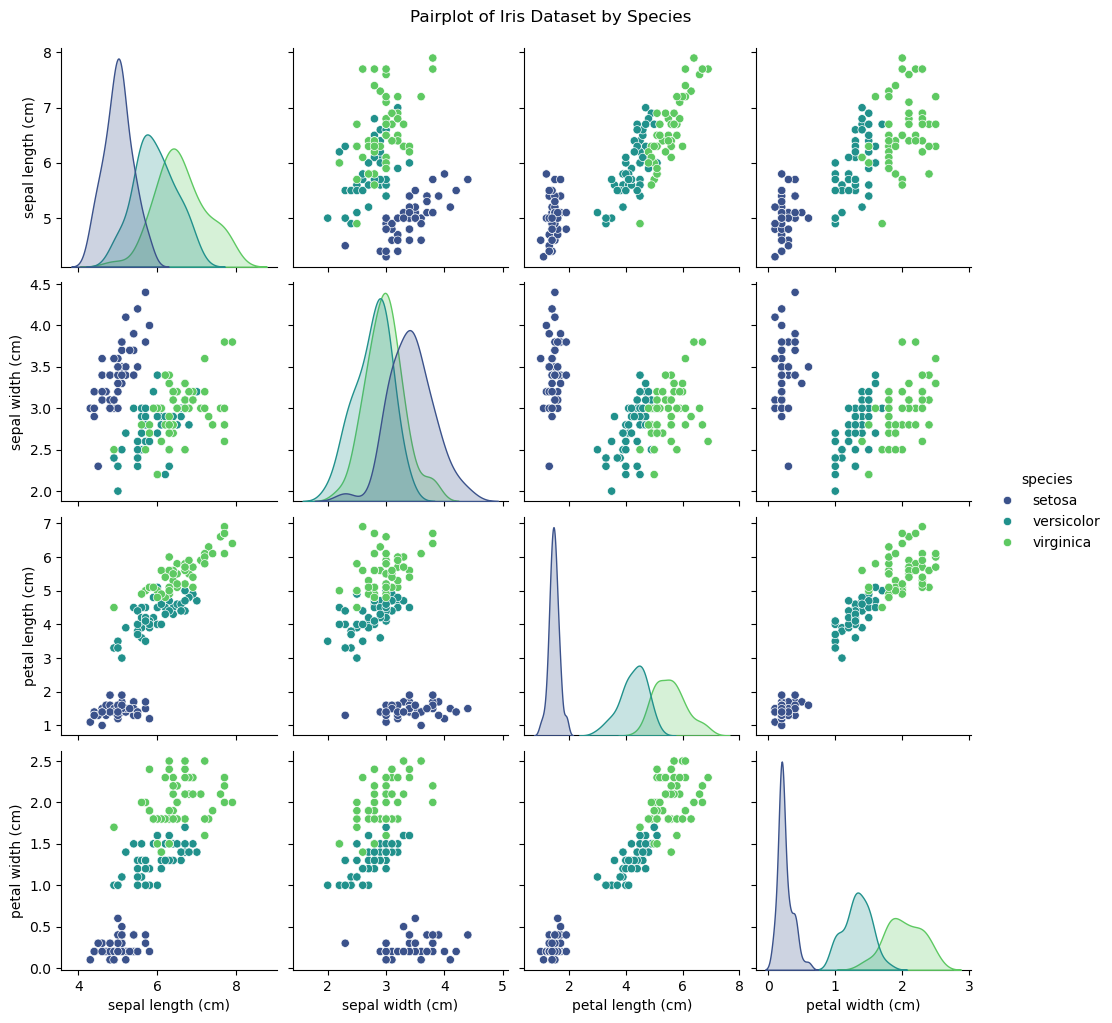

In [4]:

# Exploratory Data Analysis
# Pairplot to visualize distributions of features by species
sns.pairplot(iris_df, hue='species', palette='viridis')
plt.suptitle("Pairplot of Iris Dataset by Species", y=1.02)
plt.show()


Z-test for petal length between Setosa and Versicolor:
Z-statistic = -39.49, p-value = 0.0000


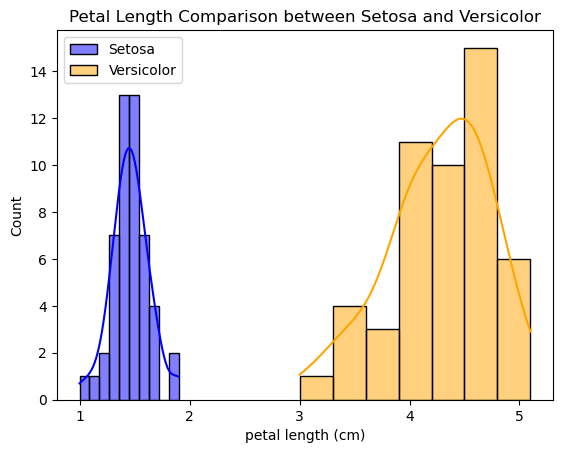

In [5]:

# 1. Z-test: Compare petal length between two species (e.g., Setosa and Versicolor)
setosa_petal_length = iris_df[iris_df['species'] == 'setosa']['petal length (cm)']
versicolor_petal_length = iris_df[iris_df['species'] == 'versicolor']['petal length (cm)']

# Performing Z-test for petal length between Setosa and Versicolor
z_stat, p_val = ztest(setosa_petal_length, versicolor_petal_length)
print(f"Z-test for petal length between Setosa and Versicolor:\nZ-statistic = {z_stat:.2f}, p-value = {p_val:.4f}")
# Plot Z-test results
sns.histplot(setosa_petal_length, color='blue', label='Setosa', kde=True)
sns.histplot(versicolor_petal_length, color='orange', label='Versicolor', kde=True)
plt.title("Petal Length Comparison between Setosa and Versicolor")
plt.legend()
plt.show()


T-test for sepal width between Setosa and Versicolor:
T-statistic = 9.45, p-value = 0.0000


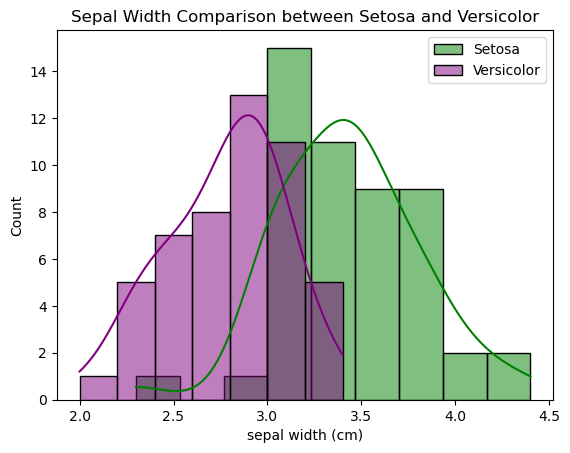

In [6]:

# 2. T-test: Compare sepal width between two species (Setosa and Versicolor)
setosa_sepal_width = iris_df[iris_df['species'] == 'setosa']['sepal width (cm)']
versicolor_sepal_width = iris_df[iris_df['species'] == 'versicolor']['sepal width (cm)']

# Performing T-test for sepal width between Setosa and Versicolor
t_stat, p_val = stats.ttest_ind(setosa_sepal_width, versicolor_sepal_width)
print(f"T-test for sepal width between Setosa and Versicolor:\nT-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
# Plot T-test results
sns.histplot(setosa_sepal_width, color='green', label='Setosa', kde=True)
sns.histplot(versicolor_sepal_width, color='purple', label='Versicolor', kde=True)
plt.title("Sepal Width Comparison between Setosa and Versicolor")
plt.legend()
plt.show()


ANOVA for petal length across species:
F-statistic = 1180.16, p-value = 0.0000


/tmp/ipykernel_18805/2058886529.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal length (cm)', data=iris_df, palette='Set3')


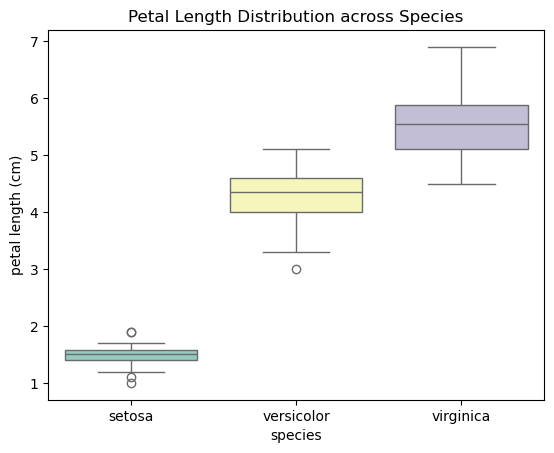

In [7]:

# 3. ANOVA Test: Comparing petal length across all species
anova_results = stats.f_oneway(
    iris_df[iris_df['species'] == 'setosa']['petal length (cm)'],
    iris_df[iris_df['species'] == 'versicolor']['petal length (cm)'],
    iris_df[iris_df['species'] == 'virginica']['petal length (cm)']
)
print(f"ANOVA for petal length across species:\nF-statistic = {anova_results.statistic:.2f}, p-value = {anova_results.pvalue:.4f}")
# Boxplot for ANOVA visualization
sns.boxplot(x='species', y='petal length (cm)', data=iris_df, palette='Set3')
plt.title("Petal Length Distribution across Species")
plt.show()


Chi-squared test for independence between sepal width category and species:
Chi2 = 45.12, p-value = 0.0000


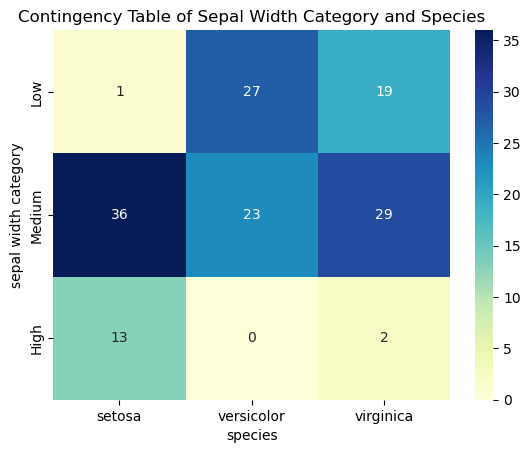

In [8]:

# 4. Chi-squared Test: Testing independence of sepal width and species categories
# Discretizing sepal width for chi-squared
iris_df['sepal width category'] = pd.cut(iris_df['sepal width (cm)'], bins=3, labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(iris_df['sepal width category'], iris_df['species'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-squared test for independence between sepal width category and species:\nChi2 = {chi2:.2f}, p-value = {p:.4f}")
# Plotting contingency table as a heatmap
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Contingency Table of Sepal Width Category and Species")
plt.show()



### Documentation Summary

1. **Data Loading and Preprocessing**:
   - Load the Iris dataset and map species numbers to their names.
   - Conduct initial data inspection to verify there are no missing values.
   - Use `sns.pairplot` for a visual overview of feature distributions by species.

2. **Statistical Tests**:
   - **Z-test**: Compares *petal length* between *Setosa* and *Versicolor*. Visualized with a histogram overlay of petal lengths.
   - **T-test**: Compares *sepal width* between *Setosa* and *Versicolor*. Visualized with a histogram overlay of sepal widths.
   - **ANOVA**: Analyzes the variance in *petal length* across all three species (*Setosa*, *Versicolor*, *Virginica*), testing if the mean petal lengths are significantly different. Visualized with a boxplot.
   - **Chi-squared Test**: Tests independence between species and a binned version of *sepal width*, visualized with a heatmap of the contingency table.

3. **Visualizations**:
   - **Pairplot**: Shows relationships between features, color-coded by species, giving insights into possible patterns across species.
   - **Histograms**: Used for both Z-test and T-test comparisons, with KDE curves to show distributions clearly.
   - **Boxplot**: Highlights ANOVA results, showing variation in petal length across species.
   - **Heatmap**: Visualizes the Chi-squared test contingency table, helping illustrate relationships between binned sepal width categories and species.

### Interpretation of Results

- **Z-test and T-test**: Assess significant differences in mean values (petal length and sepal width) between two species. A significant p-value indicates a difference in these feature distributions.
- **ANOVA**: Analyzes petal length variance across species; a significant result implies the means are not equal.
- **Chi-squared Test**: Tests for independence between categorical variables (species and binned sepal width), with a significant p-value indicating an association.

This project structure allows for a deep understanding of relationships within the Iris dataset through both statistical analysis and informative visualizations.